# Rainfall Prediction

one of the difficult and uncertain tasks that have a significant impact on human society. Timely and accurate forecasting can proactively help reduce human and financial loss. This study presents a set of experiments that involve the use of common machine learning techniques to create models that can predict whether it will rain tomorrow or not based on the weather data for that day in major cities in Australia.

I’ve always liked knowing the parameters meteorologists take into account before making a weather forecast, so I found the dataset interesting. From an expert’s point of view, however, this dataset is fairly straightforward. At the end of this article, you will learn:

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

In [2]:
tDF = pd.read_csv("Rainfall.csv")
tDF

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
0,2008-12-01,Albury,13.4,22.9,0.6,NaN,NaN,W,44.0,W,...,71.0,22.0,1007.7,1007.1,8.0,NaN,16.9,21.8,No,No
1,2008-12-02,Albury,7.4,25.1,0.0,NaN,NaN,WNW,44.0,NNW,...,44.0,25.0,1010.6,1007.8,NaN,NaN,17.2,24.3,No,No
2,2008-12-03,Albury,12.9,25.7,0.0,NaN,NaN,WSW,46.0,W,...,38.0,30.0,1007.6,1008.7,NaN,2.0,21.0,23.2,No,No
3,2008-12-04,Albury,9.2,28.0,0.0,NaN,NaN,NE,24.0,SE,...,45.0,16.0,1017.6,1012.8,NaN,NaN,18.1,26.5,No,No
4,2008-12-05,Albury,17.5,32.3,1.0,NaN,NaN,W,41.0,ENE,...,82.0,33.0,1010.8,1006.0,7.0,8.0,17.8,29.7,No,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8420,2017-06-21,Uluru,2.8,23.4,0.0,NaN,NaN,E,31.0,SE,...,51.0,24.0,1024.6,1020.3,NaN,NaN,10.1,22.4,No,No
8421,2017-06-22,Uluru,3.6,25.3,0.0,NaN,NaN,NNW,22.0,SE,...,56.0,21.0,1023.5,1019.1,NaN,NaN,10.9,24.5,No,No
8422,2017-06-23,Uluru,5.4,26.9,0.0,NaN,NaN,N,37.0,SE,...,53.0,24.0,1021.0,1016.8,NaN,NaN,12.5,26.1,No,No
8423,2017-06-24,Uluru,7.8,27.0,0.0,NaN,NaN,SE,28.0,SSE,...,51.0,24.0,1019.4,1016.5,3.0,2.0,15.1,26.0,No,No


In [3]:
tDF.shape

(8425, 23)

# checking for null values

In [4]:
tDF.isnull().sum()

Date                0
Location            0
MinTemp            75
MaxTemp            60
Rainfall          240
Evaporation      3512
Sunshine         3994
WindGustDir       991
WindGustSpeed     991
WindDir9am        829
WindDir3pm        308
WindSpeed9am       76
WindSpeed3pm      107
Humidity9am        59
Humidity3pm       102
Pressure9am      1309
Pressure3pm      1312
Cloud9am         2421
Cloud3pm         2455
Temp9am            56
Temp3pm            96
RainToday         240
RainTomorrow      239
dtype: int64

There are a lot of null values in the columns.

# Checking for blank spaces, random characters in each column

In [5]:
search =[" ","?","-"," ?"," -","? ","- "," ? "," - ","NA","N/A"," NA"," N/A"]
for c in tDF:
    for s in search:
        print(f"{s} in {c} = ",end= " ")
        print((tDF[c] == s).sum())

  in Date =  0
? in Date =  0
- in Date =  0
 ? in Date =  0
 - in Date =  0
?  in Date =  0
-  in Date =  0
 ?  in Date =  0
 -  in Date =  0
NA in Date =  0
N/A in Date =  0
 NA in Date =  0
 N/A in Date =  0
  in Location =  0
? in Location =  0
- in Location =  0
 ? in Location =  0
 - in Location =  0
?  in Location =  0
-  in Location =  0
 ?  in Location =  0
 -  in Location =  0
NA in Location =  0
N/A in Location =  0
 NA in Location =  0
 N/A in Location =  0
  in MinTemp =  0
? in MinTemp =  0
- in MinTemp =  0
 ? in MinTemp =  0
 - in MinTemp =  0
?  in MinTemp =  0
-  in MinTemp =  0
 ?  in MinTemp =  0
 -  in MinTemp =  0
NA in MinTemp =  0
N/A in MinTemp =  0
 NA in MinTemp =  0
 N/A in MinTemp =  0
  in MaxTemp =  0
? in MaxTemp =  0
- in MaxTemp =  0
 ? in MaxTemp =  0
 - in MaxTemp =  0
?  in MaxTemp =  0
-  in MaxTemp =  0
 ?  in MaxTemp =  0
 -  in MaxTemp =  0
NA in MaxTemp =  0
N/A in MaxTemp =  0
 NA in MaxTemp =  0
 N/A in MaxTemp =  0
  in Rainfall =  0
? in Ra

There are no blank spaces, random characters in columns of the dataset


It is observed that the total of null values in each column is less than 1% of total data . Therefore dropping those rows.

In [6]:
tDF.dropna(inplace=True)

In [7]:
tDF.isnull().sum()

Date             0
Location         0
MinTemp          0
MaxTemp          0
Rainfall         0
Evaporation      0
Sunshine         0
WindGustDir      0
WindGustSpeed    0
WindDir9am       0
WindDir3pm       0
WindSpeed9am     0
WindSpeed3pm     0
Humidity9am      0
Humidity3pm      0
Pressure9am      0
Pressure3pm      0
Cloud9am         0
Cloud3pm         0
Temp9am          0
Temp3pm          0
RainToday        0
RainTomorrow     0
dtype: int64

In [8]:
tDF.shape

(3790, 23)

There are no more null values.

In [9]:
tDF.reset_index(inplace=True,drop=True) # resetting the index


# Getting the basic summary and statistical information of the data.¶


In [10]:
tDF.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3790 entries, 0 to 3789
Data columns (total 23 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Date           3790 non-null   object 
 1   Location       3790 non-null   object 
 2   MinTemp        3790 non-null   float64
 3   MaxTemp        3790 non-null   float64
 4   Rainfall       3790 non-null   float64
 5   Evaporation    3790 non-null   float64
 6   Sunshine       3790 non-null   float64
 7   WindGustDir    3790 non-null   object 
 8   WindGustSpeed  3790 non-null   float64
 9   WindDir9am     3790 non-null   object 
 10  WindDir3pm     3790 non-null   object 
 11  WindSpeed9am   3790 non-null   float64
 12  WindSpeed3pm   3790 non-null   float64
 13  Humidity9am    3790 non-null   float64
 14  Humidity3pm    3790 non-null   float64
 15  Pressure9am    3790 non-null   float64
 16  Pressure3pm    3790 non-null   float64
 17  Cloud9am       3790 non-null   float64
 18  Cloud3pm

In [11]:
tDF.describe()

,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm
count,3790.000000,3790.000000,3790.000000,3790.000000,3790.000000,3790.000000,3790.000000,3790.000000,3790.000000,3790.000000,3790.000000,3790.000000,3790.000000,3790.000000,3790.000000,3790.000000
mean,14.071029,24.733483,2.451768,5.292533,7.852744,41.203958,16.377836,20.099208,63.683641,49.435620,1017.488047,1015.037836,4.116623,4.214776,18.963536,23.226201
std,5.161176,6.068364,7.772025,3.642341,3.816696,13.857829,9.516511,8.719867,16.273443,17.673797,6.560724,6.485755,2.773039,2.647355,5.528374,5.929694
min,-0.700000,10.800000,0.000000,0.000000,0.000000,13.000000,2.000000,2.000000,11.000000,6.000000,992.900000,990.800000,0.000000,0.000000,4.500000,9.400000
25%,10.200000,20.300000,0.000000,2.800000,5.200000,31.000000,9.000000,13.000000,53.000000,38.000000,1013.100000,1010.400000,1.000000,1.000000,14.900000,19.100000
50%,14.000000,24.100000,0.000000,4.600000,8.900000,39.000000,15.000000,20.000000,64.000000,49.000000,1017.400000,1015.050000,5.000000,5.000000,18.700000,22.700000
75%,17.900000,29.200000,0.800000,7.000000,10.800000,50.000000,22.000000,26.000000,75.000000,61.000000,1021.700000,1019.300000,7.000000,7.000000,23.200000,27.300000
max,28.500000,43.600000,168.400000,37.000000,13.900000,102.000000,61.000000,52.000000,99.000000,98.000000,1039.000000,1035.600000,8.000000,8.000000,39.400000,42.400000


In [12]:
tDF.skew()

MinTemp          0.039516
MaxTemp          0.237727
Rainfall         7.592966
Evaporation      2.114169
Sunshine        -0.591076
WindGustSpeed    0.699143
WindSpeed9am     0.935658
WindSpeed3pm     0.356434
Humidity9am     -0.194562
Humidity3pm      0.174915
Pressure9am      0.032381
Pressure3pm      0.096222
Cloud9am        -0.128711
Cloud3pm        -0.155781
Temp9am          0.029503
Temp3pm          0.239057
dtype: float64

In [13]:
tDF.nunique()

Date             1873
Location            6
MinTemp           249
MaxTemp           288
Rainfall          174
Evaporation       101
Sunshine          140
WindGustDir        16
WindGustSpeed      46
WindDir9am         16
WindDir3pm         16
WindSpeed9am       31
WindSpeed3pm       28
Humidity9am        86
Humidity3pm        93
Pressure9am       338
Pressure3pm       332
Cloud9am            9
Cloud3pm            9
Temp9am           266
Temp3pm           286
RainToday           2
RainTomorrow        2
dtype: int64

# Analyzing the Target Columns

<AxesSubplot:xlabel='Temp9am', ylabel='Density'>

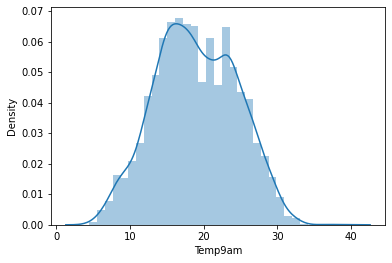

In [14]:
sns.distplot(tDF.Temp9am)

<AxesSubplot:xlabel='Temp3pm', ylabel='Density'>

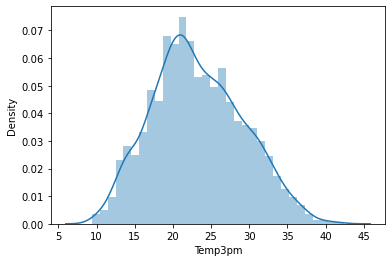

In [15]:
sns.distplot(tDF.Temp3pm)

Distributions are continuous and look slightly skewed.

# Analyzing the Feature Columns

In [16]:
tDF.dtypes[tDF.dtypes == 'object']

Date            object
Location        object
WindGustDir     object
WindDir9am      object
WindDir3pm      object
RainToday       object
RainTomorrow    object
dtype: object

In [17]:
tDF.Date.unique()

array(['2009-03-10', '2009-03-11', '2009-03-12', ..., '2012-08-16',
       '2012-09-28', '2012-11-10'], dtype=object)

In [18]:
tDF.Date.value_counts()

2011-11-24    4
2012-01-04    4
2011-07-07    4
2012-01-10    4
2011-10-27    4
             ..
2009-04-19    1
2014-03-30    1
2014-02-07    1
2013-11-28    1
2014-04-13    1
Name: Date, Length: 1873, dtype: int64

# Extracting 'Day' and 'Month' and 'Year' columns from 'Date' Columnn

In [19]:
tDF['Date']=pd.to_datetime(tDF['Date'])

In [20]:
tDF['Day']=tDF['Date'].apply(lambda d:d.day)

In [21]:
tDF['Month']=tDF['Date'].apply(lambda m:m.month)

In [22]:
tDF['Year']=tDF['Date'].apply(lambda y:y.year)

In [23]:
tDF.head()

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow,Day,Month,Year
0,2009-03-10,CoffsHarbour,19.8,27.1,24.4,8.6,9.0,ESE,35.0,SW,...,1017.9,6.0,6.0,22.0,26.0,Yes,Yes,10,3,2009
1,2009-03-11,CoffsHarbour,18.7,25.6,6.8,3.8,3.4,E,33.0,SW,...,1020.1,4.0,7.0,21.0,20.9,Yes,Yes,11,3,2009
2,2009-03-12,CoffsHarbour,16.5,25.5,16.8,2.8,6.1,WSW,19.0,WSW,...,1020.1,5.0,7.0,21.0,24.5,Yes,No,12,3,2009
3,2009-03-13,CoffsHarbour,18.5,26.9,0.0,3.2,11.0,ENE,30.0,SW,...,1016.6,2.0,5.0,23.3,26.4,No,No,13,3,2009
4,2009-03-14,CoffsHarbour,18.2,28.2,0.0,6.8,9.0,NNE,50.0,NNW,...,1012.8,1.0,1.0,24.0,25.9,No,Yes,14,3,2009


In [24]:
tDF.dtypes[tDF.dtypes != 'object']

Date             datetime64[ns]
MinTemp                 float64
MaxTemp                 float64
Rainfall                float64
Evaporation             float64
Sunshine                float64
WindGustSpeed           float64
WindSpeed9am            float64
WindSpeed3pm            float64
Humidity9am             float64
Humidity3pm             float64
Pressure9am             float64
Pressure3pm             float64
Cloud9am                float64
Cloud3pm                float64
Temp9am                 float64
Temp3pm                 float64
Day                       int64
Month                     int64
Year                      int64
dtype: object

In [25]:
tDF.nunique()

Date             1873
Location            6
MinTemp           249
MaxTemp           288
Rainfall          174
Evaporation       101
Sunshine          140
WindGustDir        16
WindGustSpeed      46
WindDir9am         16
WindDir3pm         16
WindSpeed9am       31
WindSpeed3pm       28
Humidity9am        86
Humidity3pm        93
Pressure9am       338
Pressure3pm       332
Cloud9am            9
Cloud3pm            9
Temp9am           266
Temp3pm           286
RainToday           2
RainTomorrow        2
Day                31
Month              12
Year                8
dtype: int64

In [26]:
tDF.Date.value_counts()

2011-08-30    4
2011-08-25    4
2011-06-28    4
2011-03-22    4
2011-08-16    4
             ..
2013-09-18    1
2014-05-17    1
2009-08-11    1
2010-10-02    1
2013-12-04    1
Name: Date, Length: 1873, dtype: int64

<AxesSubplot:xlabel='Date', ylabel='count'>

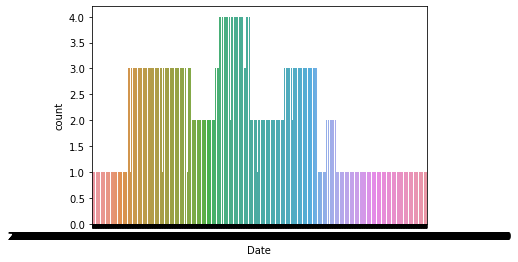

In [27]:
sns.countplot(tDF.Date)

 Reports from all date are fairly balanced.

In [28]:
tDF.Cloud9am.value_counts()

7.0    1029
1.0     761
0.0     376
6.0     343
3.0     298
5.0     292
2.0     271
8.0     251
4.0     169
Name: Cloud9am, dtype: int64

In [29]:
tDF.Cloud3pm.value_counts()

7.0    967
1.0    712
6.0    380
2.0    352
5.0    348
3.0    295
0.0    259
8.0    244
4.0    233
Name: Cloud3pm, dtype: int64

Cloud9am and Cloud3pm are cordinates of geolocations for which weather data from the date are available.

In [30]:
tDF.Temp9am.value_counts()

14.8    39
16.2    37
14.9    36
13.8    35
17.1    34
        ..
8.3      1
32.7     1
36.8     1
30.5     1
32.6     1
Name: Temp9am, Length: 266, dtype: int64

In [31]:
tDF.Temp3pm.value_counts()

21.1    39
21.7    38
19.2    35
21.4    35
20.2    32
        ..
39.7     1
33.8     1
40.5     1
39.6     1
12.0     1
Name: Temp3pm, Length: 286, dtype: int64

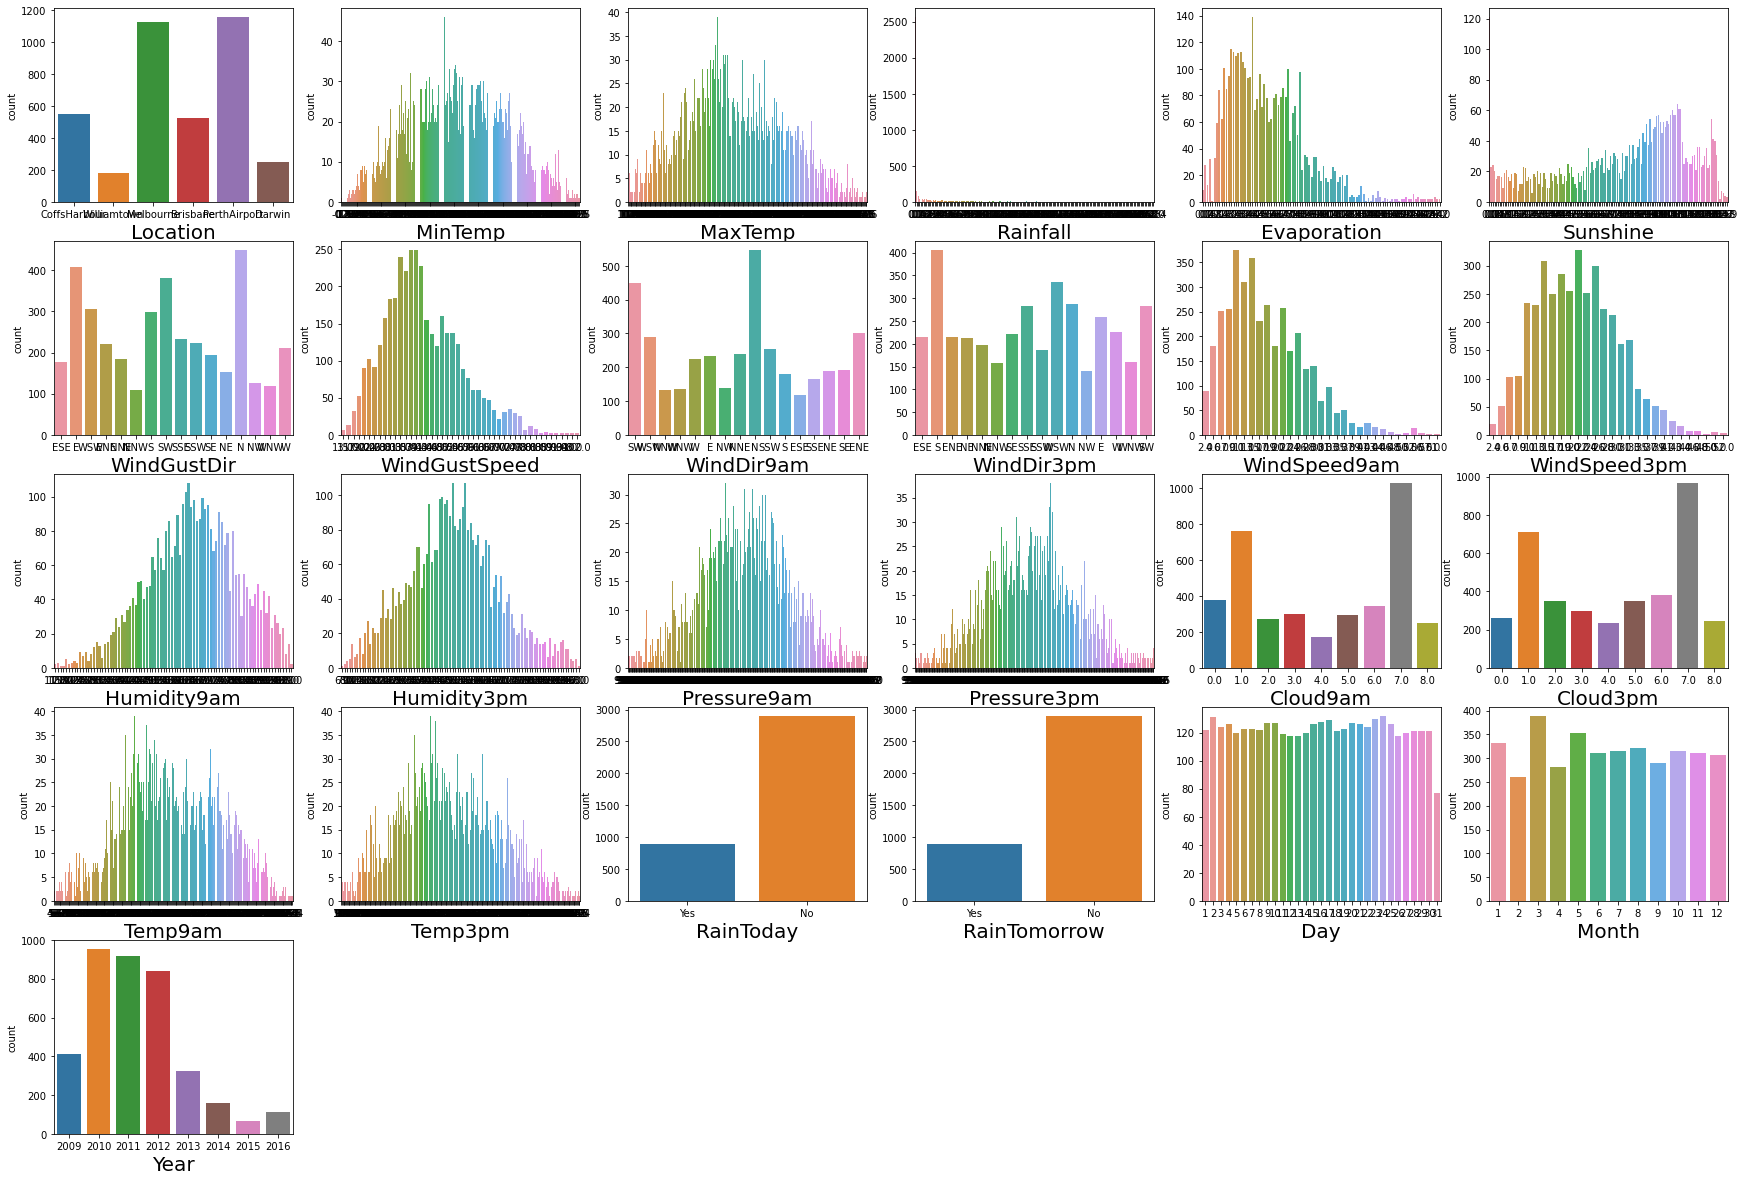

In [32]:
plt.figure(figsize=(30,25),facecolor='white')
plotnum=1
for col in tDF.drop(columns=['Date']):
    if plotnum<=30:
        plt.subplot(6,6,plotnum)
        sns.countplot(tDF[col])
        plt.xlabel(col,fontsize=20)
    plotnum+=1
plt.show()

Grouping the data date-wise to better understand the relationship between 'Date' and 'Temp9am and 'Time3pm'

In [33]:
tDF.Date

0      2009-03-10
1      2009-03-11
2      2009-03-12
3      2009-03-13
4      2009-03-14
          ...    
3785   2012-11-06
3786   2012-11-07
3787   2012-11-08
3788   2012-11-09
3789   2012-11-10
Name: Date, Length: 3790, dtype: datetime64[ns]

Text(0.5, 1.0, 'Rainfall Weather')

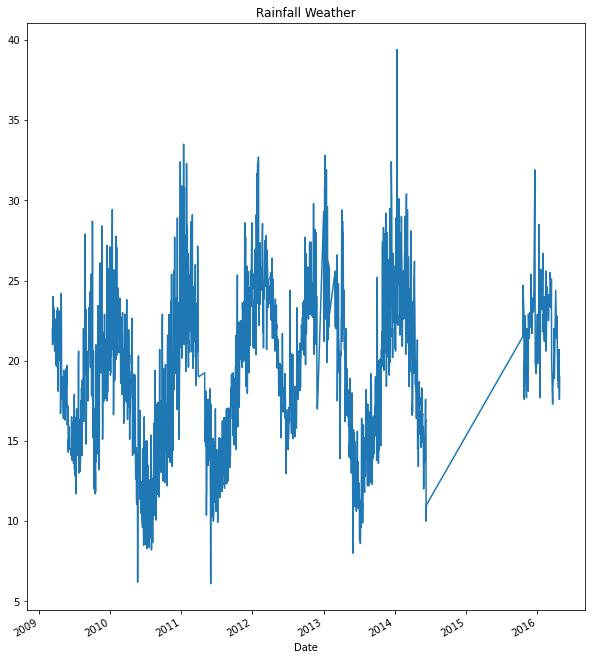

In [34]:
plt.figure(figsize=(10,12))
tDF.groupby('Date').mean()['Temp9am'].plot()
plt.title('Rainfall Weather')

Text(0.5, 1.0, 'Rainfall Weather')

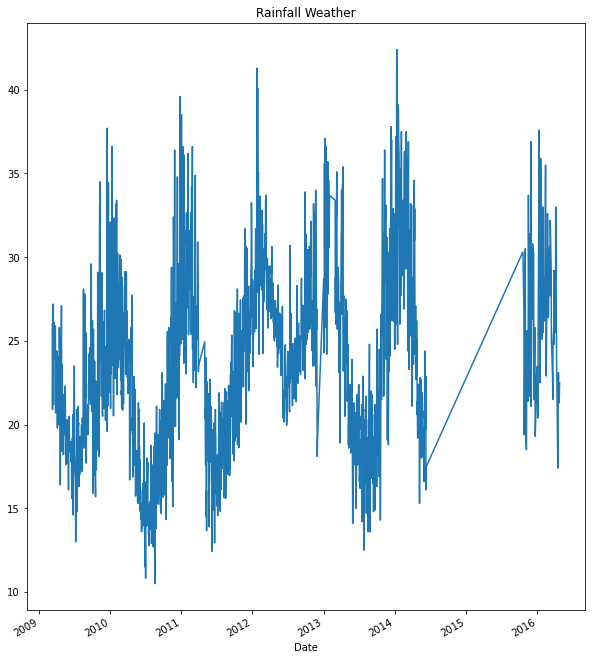

In [35]:
plt.figure(figsize=(10,12))
tDF.groupby('Date').mean()['Temp3pm'].plot()
plt.title('Rainfall Weather')

Huge weather dips are observed towards end of each year indicating peak winter season and Spikes towards the middle of each year indicating peak summer seasson.

Gradual rise in peak temperatures can also be observed as one moves from 2009 to mid 2015

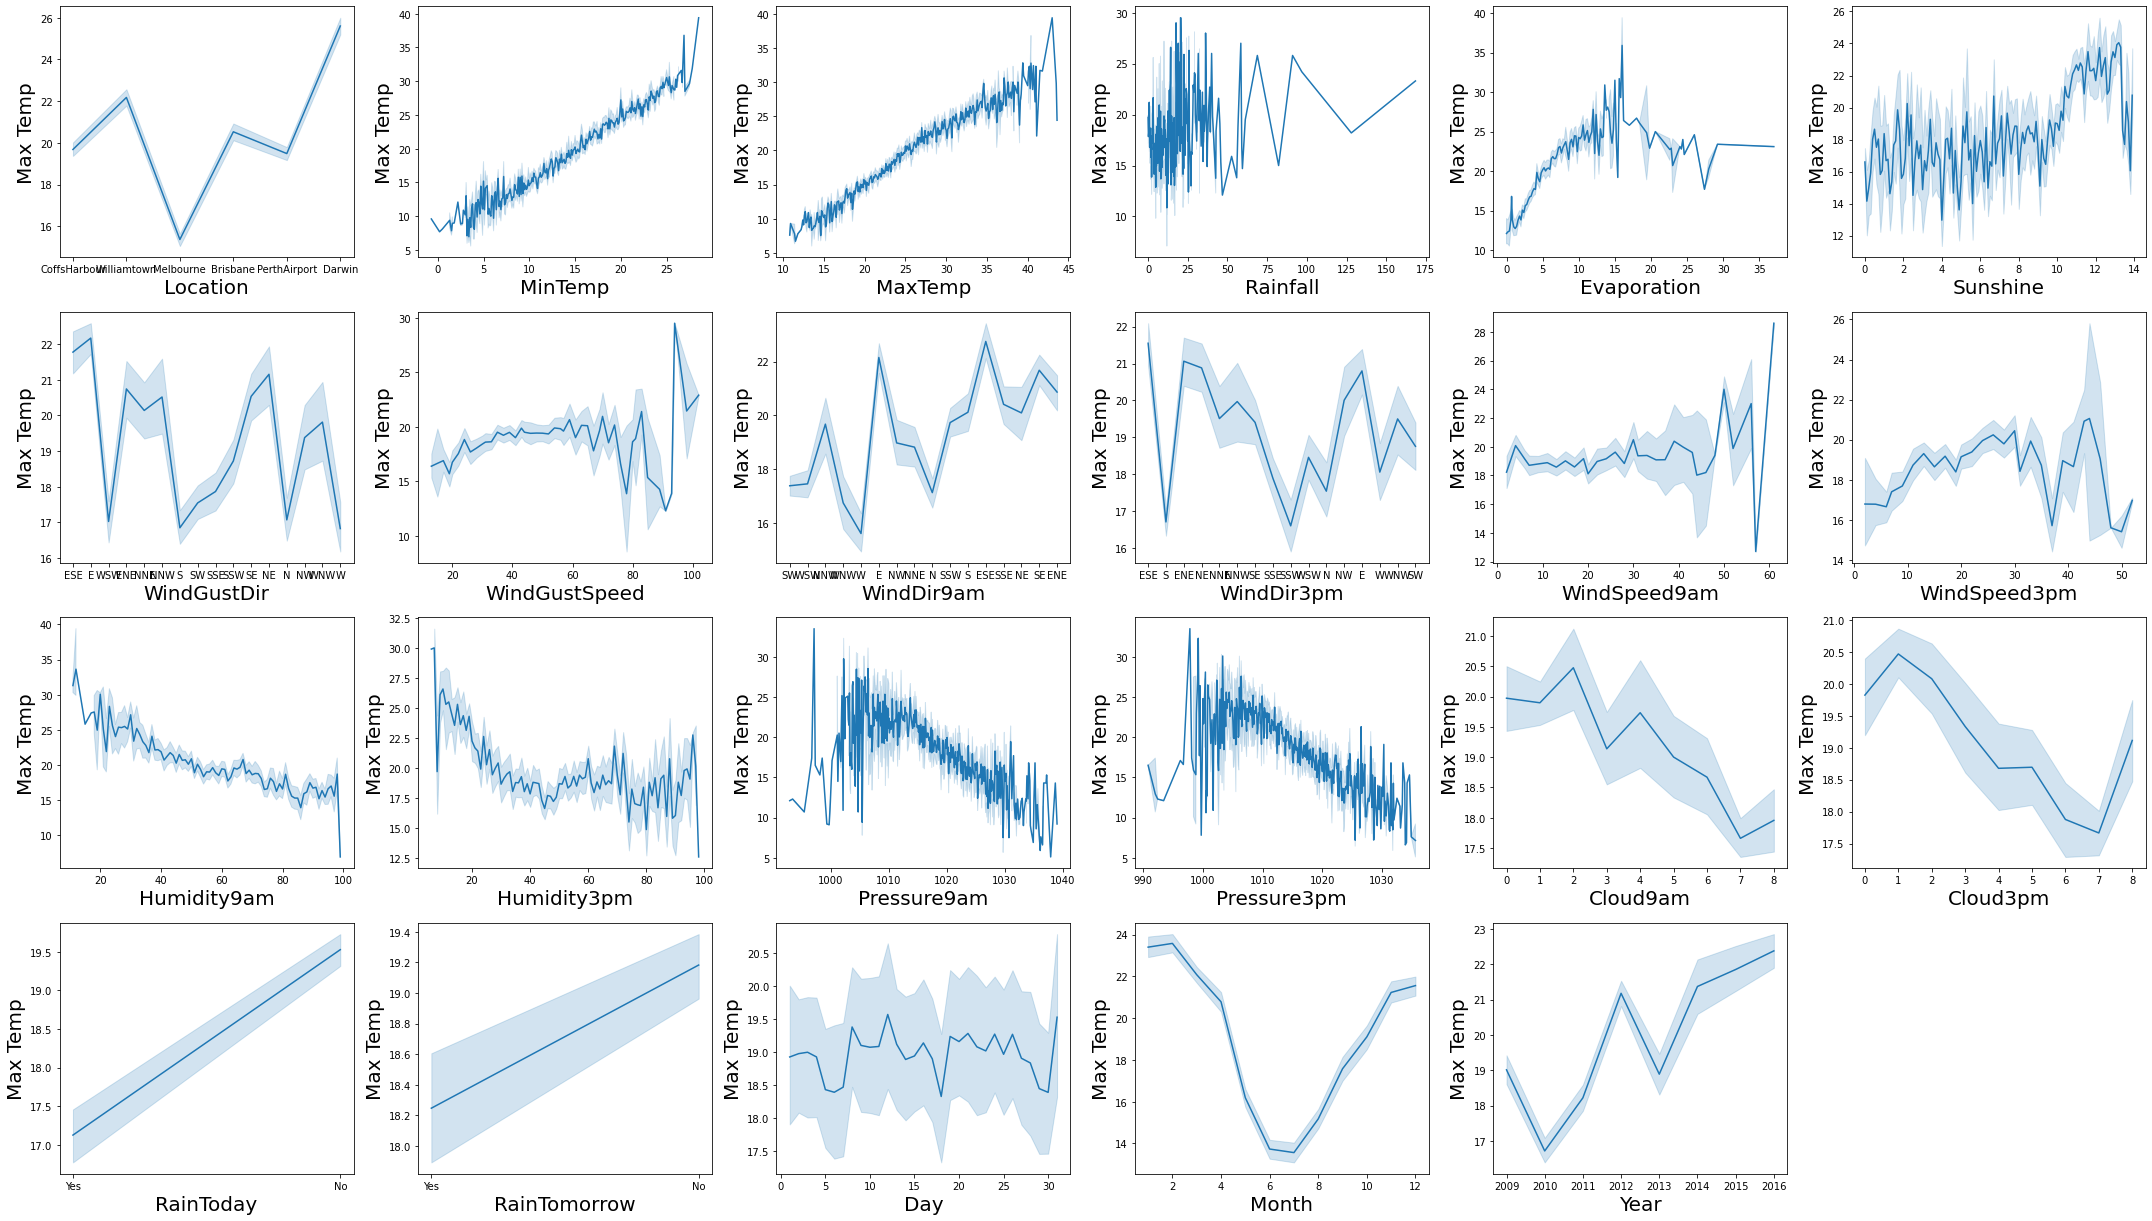

In [36]:
plt.figure(figsize=(30,25),facecolor='white')
plotnum=1
X  = tDF.drop(columns=['Date','Temp9am','Temp3pm'])
y = tDF['Temp9am']
for col in X:
    if plotnum<=30:
        plt.subplot(6,6,plotnum)
        sns.lineplot(X[col],y)
        plt.xlabel(col,fontsize=20)
        plt.ylabel('Max Temp',fontsize=20)
    plotnum+=1
plt.tight_layout()

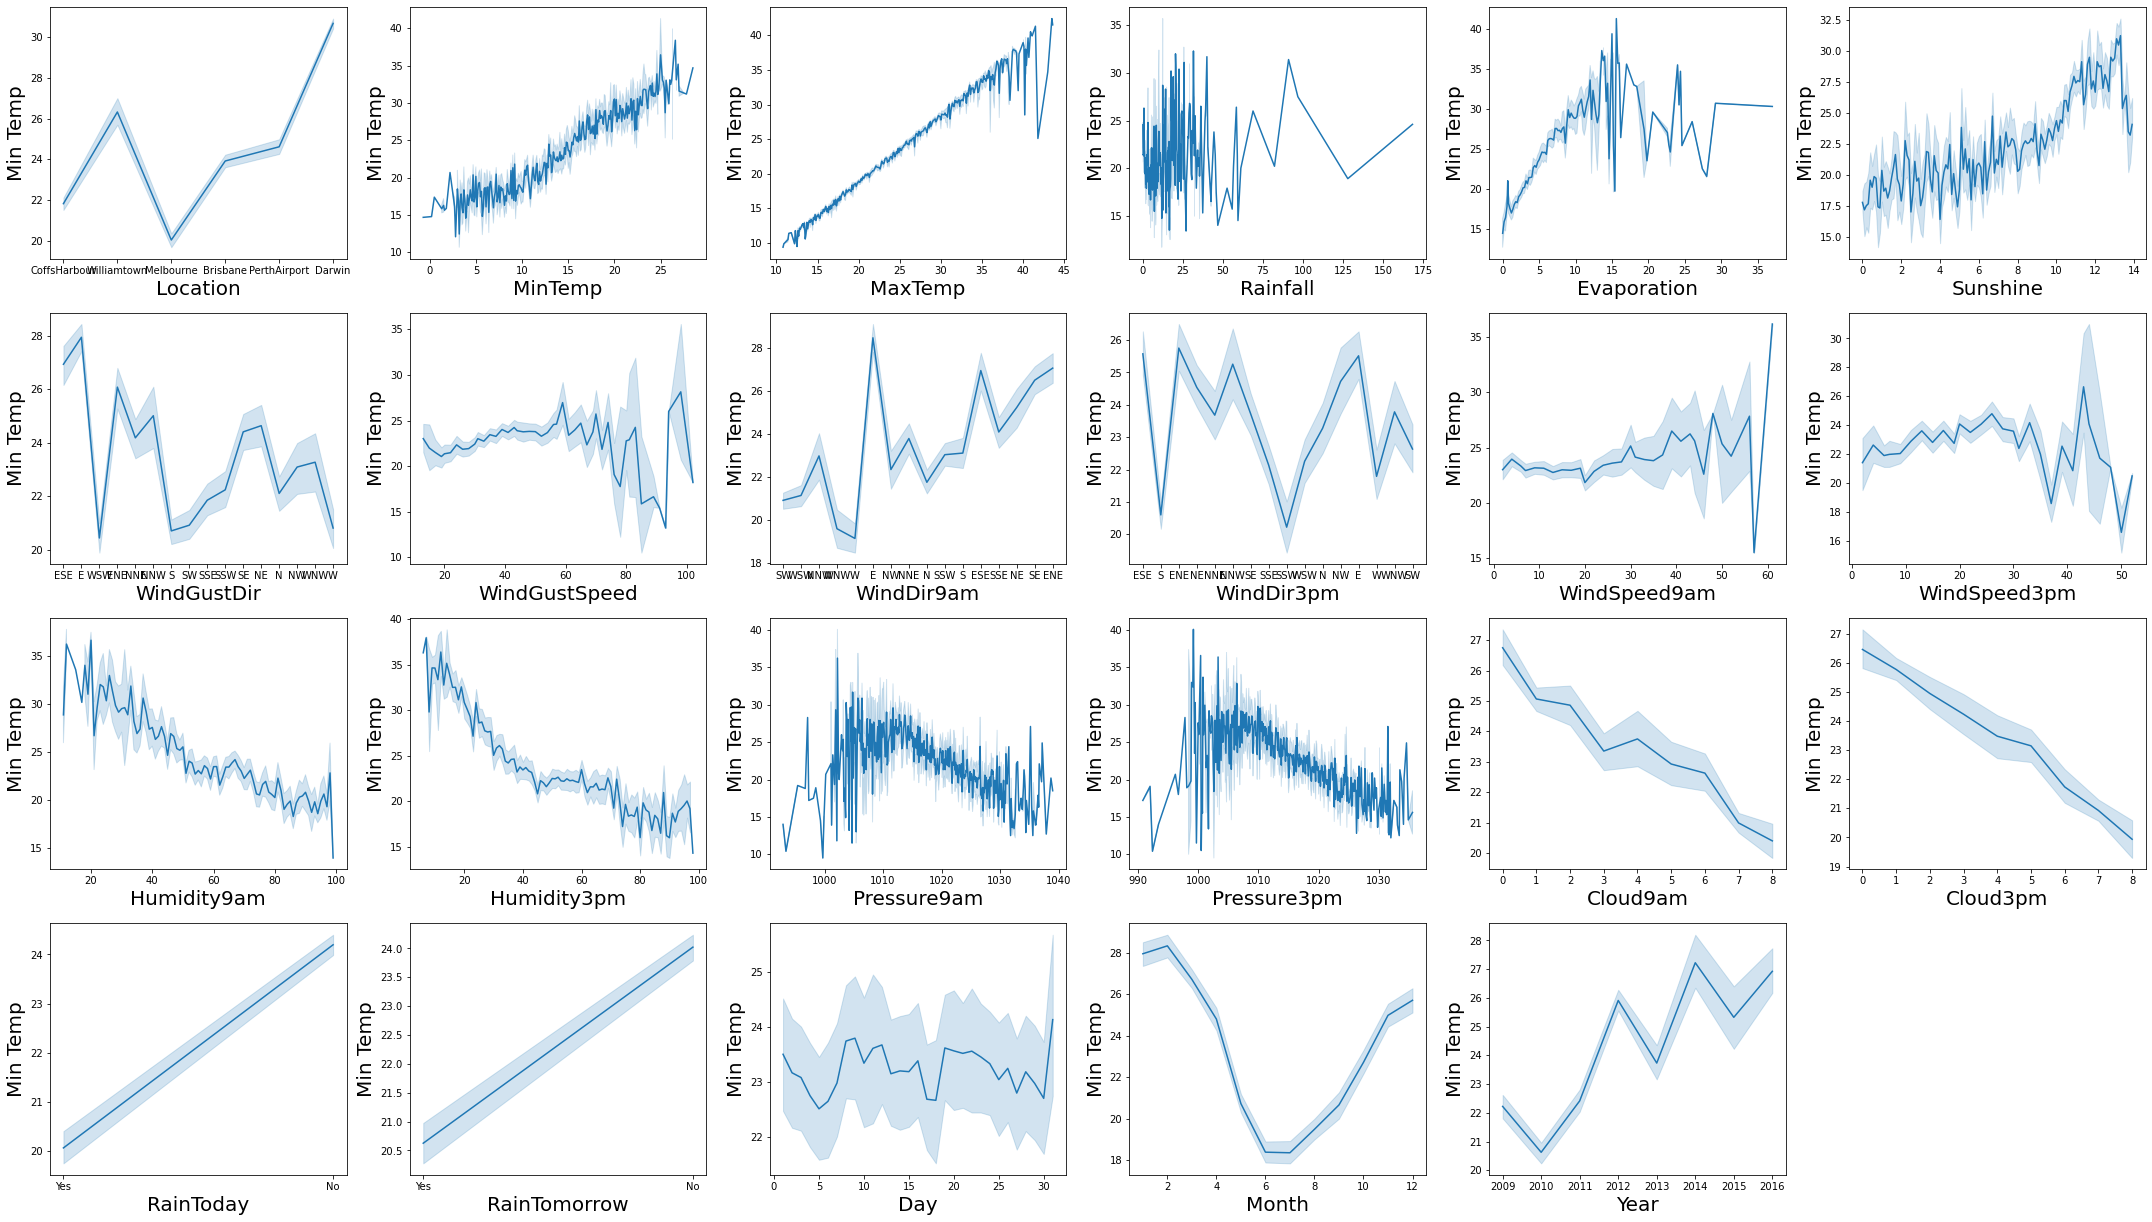

In [37]:
plt.figure(figsize=(30,25),facecolor='white')
plotnum=1
X  = tDF.drop(columns=['Date','Temp9am','Temp3pm'])
y = tDF['Temp3pm']
for col in X:
    if plotnum<=30:
        plt.subplot(6,6,plotnum)
        sns.lineplot(X[col],y)
        plt.xlabel(col,fontsize=20)
        plt.ylabel('Min Temp',fontsize=20)
    plotnum+=1
plt.tight_layout()

# Checking for Outliers in continuous data type Features.

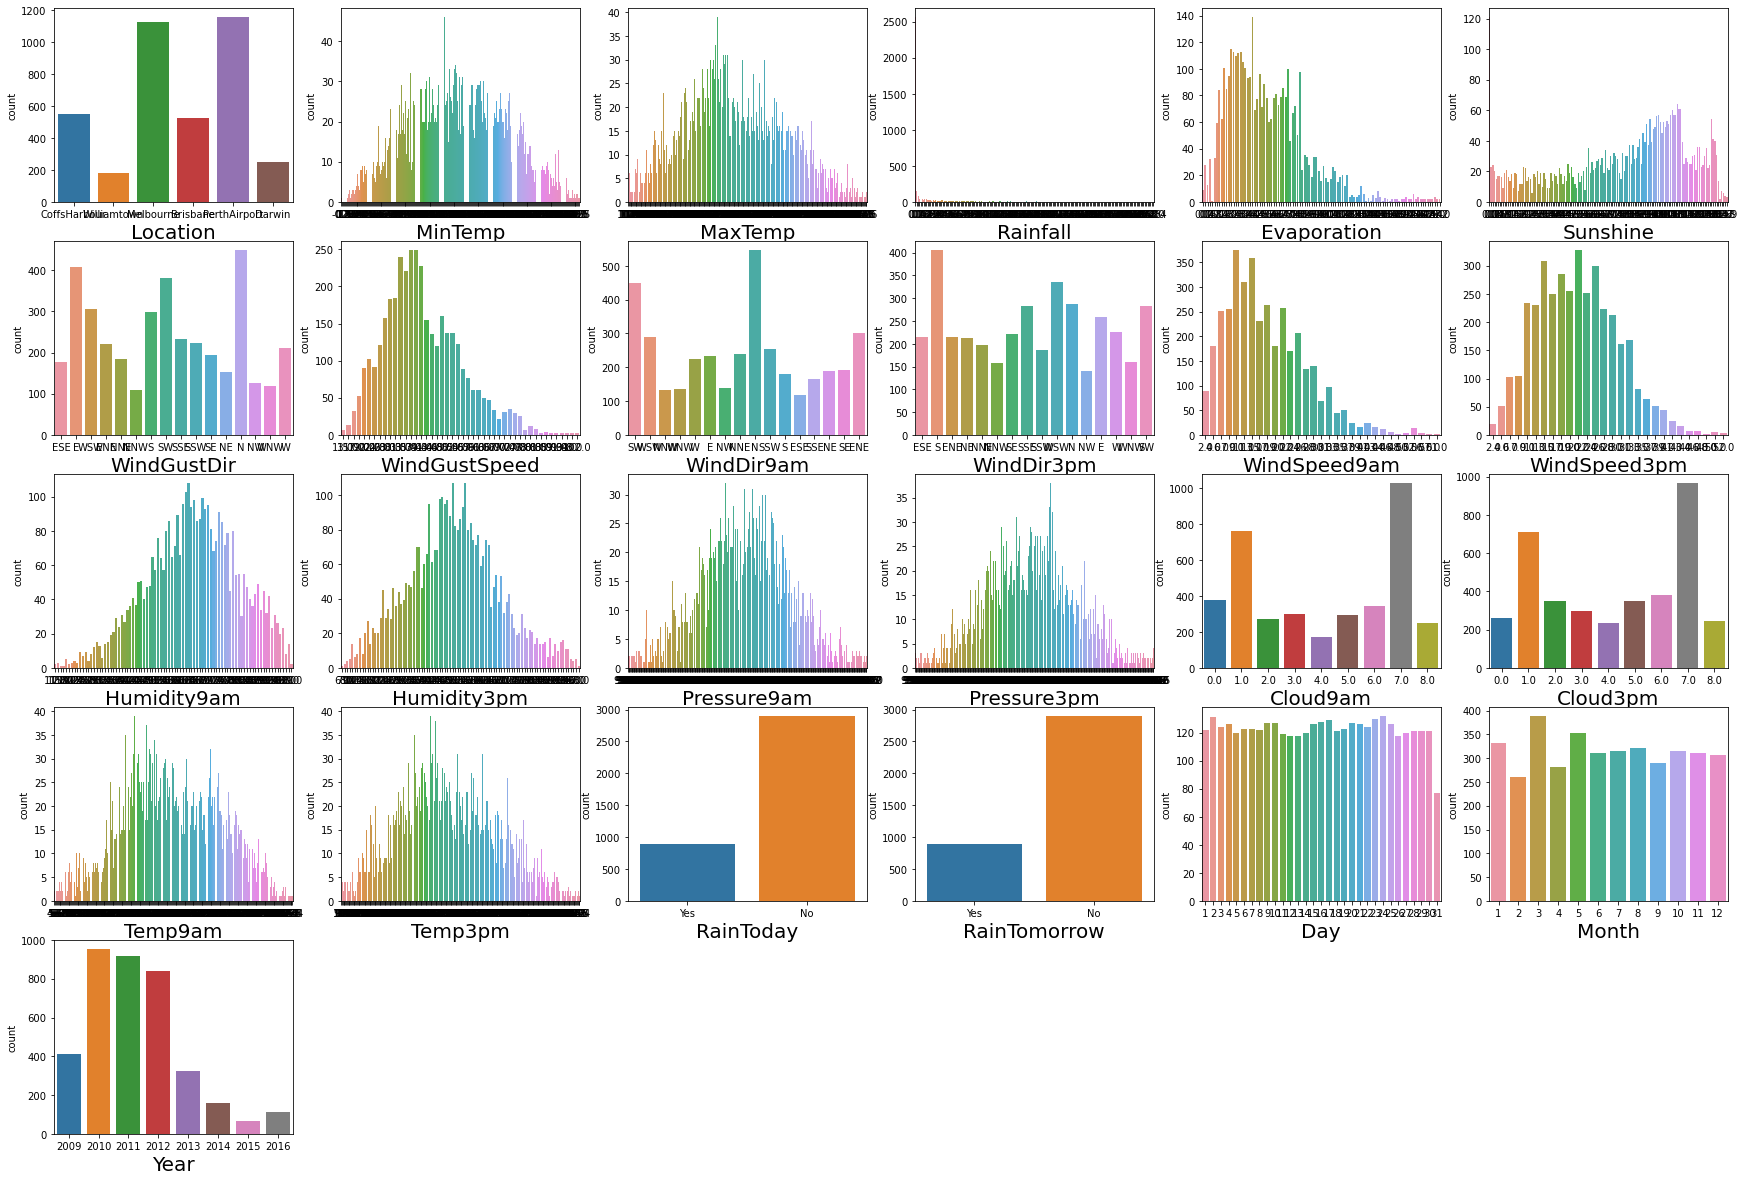

In [38]:
plt.figure(figsize=(30,25),facecolor='white')
plotnum=1
for col in tDF.drop(columns=['Date']):
    if plotnum<=30:
        plt.subplot(6,6,plotnum)
        sns.countplot(tDF[col])
        plt.xlabel(col,fontsize=20)
    plotnum+=1
plt.show()

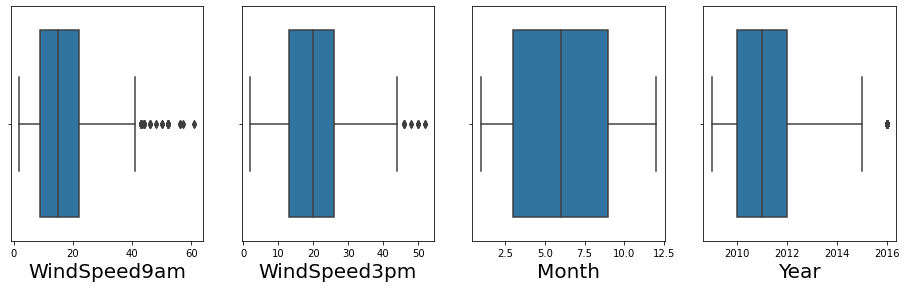

In [39]:
plt.figure(figsize=(20,25),facecolor='white')
plotnum=1
for col in tDF.drop(columns = ['Temp9am','Temp3pm','Date','MinTemp','MaxTemp','Day','Rainfall','Evaporation','Sunshine','WindGustDir','WindGustSpeed','WindDir9am','WindDir3pm','Humidity9am','Humidity3pm','Pressure9am','Pressure3pm','RainToday','RainTomorrow','Cloud9am','Cloud3pm','Location','Date'],axis=1):
    if plotnum<=11:
        plt.subplot(5,5,plotnum)
        sns.boxplot(tDF[col])
        plt.xlabel(col,fontsize=20)
    plotnum+=1
plt.show()

Outliers exist in WindSpeed9am,WindSpeed3pm,Month

# Removing Outliers using Z score Method

In [40]:
df2 =tDF[['WindSpeed9am','WindSpeed3pm','Month']]

In [41]:
from scipy.stats import zscore
zscor = zscore(df2)
z_score_abs = np.abs(zscor)

df3 = df2[(z_score_abs < 3).all(axis=1)] #taking 3 as threshold value

In [42]:
df3.shape

(3748, 3)

In [43]:
df2.shape

(3790, 3)

# Data loss %:

In [44]:
loss=(3790-3748)/3790 * 100
loss

1.108179419525066

# 1.10% Data loss is within acceptable range

In [45]:
dropindx = tDF.index.difference(df3.index)

In [46]:
dropindx

Int64Index([ 840,  858,  931,  991, 1025, 1041, 1046, 1064, 1068, 1096, 1112,
            1149, 1227, 1237, 1238, 1247, 1265, 1286, 1288, 1289, 1403, 1421,
            1494, 1554, 1588, 1604, 1609, 1627, 1631, 1659, 1675, 1712, 1790,
            1800, 1801, 1810, 1828, 1849, 1851, 1852, 2600, 3054],
           dtype='int64')

In [47]:
tDF.drop(dropindx,inplace = True)

In [48]:
tDF.shape

(3748, 26)

In [49]:
tDF.reset_index(drop=True,inplace = True) 

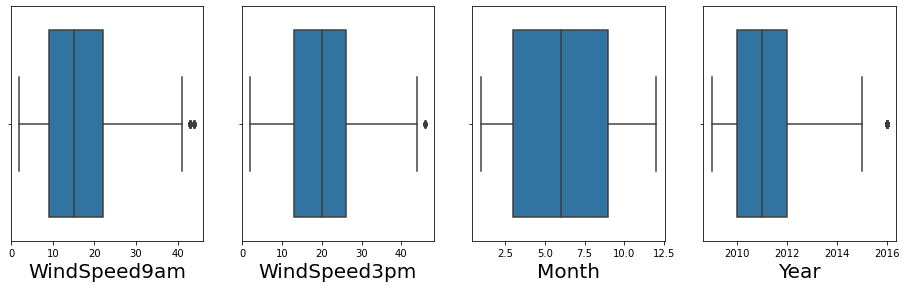

In [50]:
plt.figure(figsize=(20,25),facecolor='white')
plotnum=1
for col in tDF.drop(columns = ['Temp9am','Temp3pm','Date','MinTemp','MaxTemp','Day','Rainfall','Evaporation','Sunshine','WindGustDir','WindGustSpeed','WindDir9am','WindDir3pm','Humidity9am','Humidity3pm','Pressure9am','Pressure3pm','RainToday','RainTomorrow','Cloud9am','Cloud3pm','Location','Date'],axis=1):
    if plotnum<=11:
        plt.subplot(5,5,plotnum)
        sns.boxplot(tDF[col])
        plt.xlabel(col,fontsize=20)
    plotnum+=1
plt.show()

Some outliers have been removed

# Checking for skewness in data distributions

In [51]:
tDF.drop(columns = ['Temp9am','Temp3pm','Date','MinTemp','MaxTemp','Day','Rainfall','Evaporation','Sunshine','WindGustDir','WindGustSpeed','WindDir9am','WindDir3pm','Humidity9am','Humidity3pm','Pressure9am','Pressure3pm','RainToday','RainTomorrow','Cloud9am','Cloud3pm','Location','Date'],axis=1).skew()

WindSpeed9am    0.659667
WindSpeed3pm    0.271233
Month           0.035484
Year            0.870120
dtype: float64

WindSpeed9am,WindSpeed3am,Month are skewed.

# Normalizing Data Distribution using PowerTransformer

In [52]:
from sklearn.preprocessing import PowerTransformer

In [53]:
powtrans= PowerTransformer(method='yeo-johnson', standardize=True)

In [54]:
df4 = tDF[['WindSpeed9am','WindSpeed3pm','Month']]

In [55]:
transformed= powtrans.fit_transform(df4)

In [56]:
type(transformed)

numpy.ndarray

In [57]:
transformed = pd.DataFrame(transformed, columns=df4.columns)

In [58]:
transformed.skew()

WindSpeed9am   -0.044325
WindSpeed3pm   -0.057027
Month          -0.156438
dtype: float64

In [59]:
transformed.index = tDF.index

In [60]:
Skewed = ['WindSpeed9am','WindSpeed3pm','Month']

In [61]:
tDF[Skewed] = transformed[Skewed]

In [62]:
tDF.skew()

MinTemp          0.039595
MaxTemp          0.236700
Rainfall         7.560116
Evaporation      2.131952
Sunshine        -0.599994
WindGustSpeed    0.664083
WindSpeed9am    -0.044325
WindSpeed3pm    -0.057027
Humidity9am     -0.205265
Humidity3pm      0.173921
Pressure9am      0.050194
Pressure3pm      0.125876
Cloud9am        -0.124486
Cloud3pm        -0.144766
Temp9am          0.027763
Temp3pm          0.235864
Day             -0.005613
Month           -0.156438
Year             0.870120
dtype: float64

In [63]:
tDF

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow,Day,Month,Year
0,2009-03-10,CoffsHarbour,19.8,27.1,24.4,8.6,9.0,ESE,35.0,SW,...,1017.9,6.0,6.0,22.0,26.0,Yes,Yes,10,-0.984651,2009
1,2009-03-11,CoffsHarbour,18.7,25.6,6.8,3.8,3.4,E,33.0,SW,...,1020.1,4.0,7.0,21.0,20.9,Yes,Yes,11,-0.984651,2009
2,2009-03-12,CoffsHarbour,16.5,25.5,16.8,2.8,6.1,WSW,19.0,WSW,...,1020.1,5.0,7.0,21.0,24.5,Yes,No,12,-0.984651,2009
3,2009-03-13,CoffsHarbour,18.5,26.9,0.0,3.2,11.0,ENE,30.0,SW,...,1016.6,2.0,5.0,23.3,26.4,No,No,13,-0.984651,2009
4,2009-03-14,CoffsHarbour,18.2,28.2,0.0,6.8,9.0,NNE,50.0,NNW,...,1012.8,1.0,1.0,24.0,25.9,No,Yes,14,-0.984651,2009
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3743,2012-11-06,Darwin,25.2,34.5,3.0,4.0,9.2,NNE,39.0,N,...,1007.9,7.0,7.0,29.6,33.4,Yes,No,6,1.270015,2012
3744,2012-11-07,Darwin,26.2,33.3,0.0,6.0,5.9,N,54.0,ENE,...,1006.8,4.0,8.0,30.2,25.2,No,Yes,7,1.270015,2012
3745,2012-11-08,Darwin,24.9,32.8,20.4,6.2,8.7,WNW,37.0,NNE,...,1006.2,4.0,6.0,29.5,32.0,Yes,No,8,1.270015,2012
3746,2012-11-09,Darwin,25.5,33.1,0.0,4.8,7.1,SSE,37.0,E,...,1006.9,7.0,7.0,28.6,31.5,No,No,9,1.270015,2012


# Encoding 'Month' column

In [64]:
tDF.Month.unique()

array([-0.98465087, -0.65601669, -0.34642996, -0.05183495,  0.2305064 ,
        0.50255402,  0.76577263,  1.02129383,  1.27001514,  1.51266382,
       -1.73071365, -1.33886901])

In [65]:
tDF['Month'] = tDF.Month.map({-0.98465087:1, -0.65601669:2, -0.34642996:3, -0.05183495:4,  0.2305064:5 ,
        0.50255402:6,  0.76577263:7,  1.02129383:8,  1.27001514:9,  1.51266382:10,
       -1.73071365:11, -1.33886901:12})

In [66]:
tDF.Month

0      NaN
1      NaN
2      NaN
3      NaN
4      NaN
        ..
3743   NaN
3744   NaN
3745   NaN
3746   NaN
3747   NaN
Name: Month, Length: 3748, dtype: float64

# Finding Correlation

In [67]:
t_corr =tDF.corr()
t_corr

,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,Day,Month,Year
MinTemp,1.000000,0.739589,0.072515,0.496070,0.077937,0.141343,0.067283,0.105751,-0.074728,0.050211,-0.482999,-0.495777,0.129070,0.040524,0.861561,0.712582,-0.001444,NaN,0.160568
MaxTemp,0.739589,1.000000,-0.120196,0.593710,0.518357,0.124758,0.040999,0.062515,-0.415093,-0.422810,-0.361864,-0.463533,-0.308407,-0.308543,0.890225,0.977804,0.002719,NaN,0.273639
Rainfall,0.072515,-0.120196,1.000000,-0.062472,-0.238373,0.081477,0.011511,0.016576,0.302948,0.267037,-0.120754,-0.067910,0.221845,0.193458,-0.049655,-0.125937,-0.013758,NaN,-0.024718
Evaporation,0.496070,0.593710,-0.062472,1.000000,0.349691,0.253677,0.194139,0.182173,-0.394856,-0.311179,-0.281621,-0.303617,-0.140373,-0.195448,0.565819,0.580047,-0.000893,NaN,0.313336
Sunshine,0.077937,0.518357,-0.238373,0.349691,1.000000,-0.006501,-0.020054,0.056297,-0.516125,-0.624842,0.011959,-0.067707,-0.700673,-0.720846,0.349957,0.542648,-0.000615,NaN,0.150976
WindGustSpeed,0.141343,0.124758,0.081477,0.253677,-0.006501,1.000000,0.664672,0.684587,-0.238042,-0.141016,-0.357934,-0.320606,0.051283,0.114997,0.095765,0.085828,-0.011826,NaN,-0.035253
WindSpeed9am,0.067283,0.040999,0.011511,0.194139,-0.020054,0.664672,1.000000,0.511408,-0.320934,-0.191003,-0.151323,-0.118953,0.025302,0.063791,0.013682,0.034947,0.001412,NaN,-0.052427
WindSpeed3pm,0.105751,0.062515,0.016576,0.182173,0.056297,0.684587,0.511408,1.000000,-0.150121,-0.061939,-0.265752,-0.212503,0.049097,0.052398,0.095331,0.035002,-0.012489,NaN,-0.026180
Humidity9am,-0.074728,-0.415093,0.302948,-0.394856,-0.516125,-0.238042,-0.320934,-0.150121,1.000000,0.657864,0.120732,0.174173,0.449282,0.357923,-0.357013,-0.407466,0.004389,NaN,-0.018375
Humidity3pm,0.050211,-0.422810,0.267037,-0.311179,-0.624842,-0.141016,-0.191003,-0.061939,0.657864,1.000000,-0.044206,0.045389,0.488581,0.504861,-0.149993,-0.497420,0.017694,NaN,-0.137042


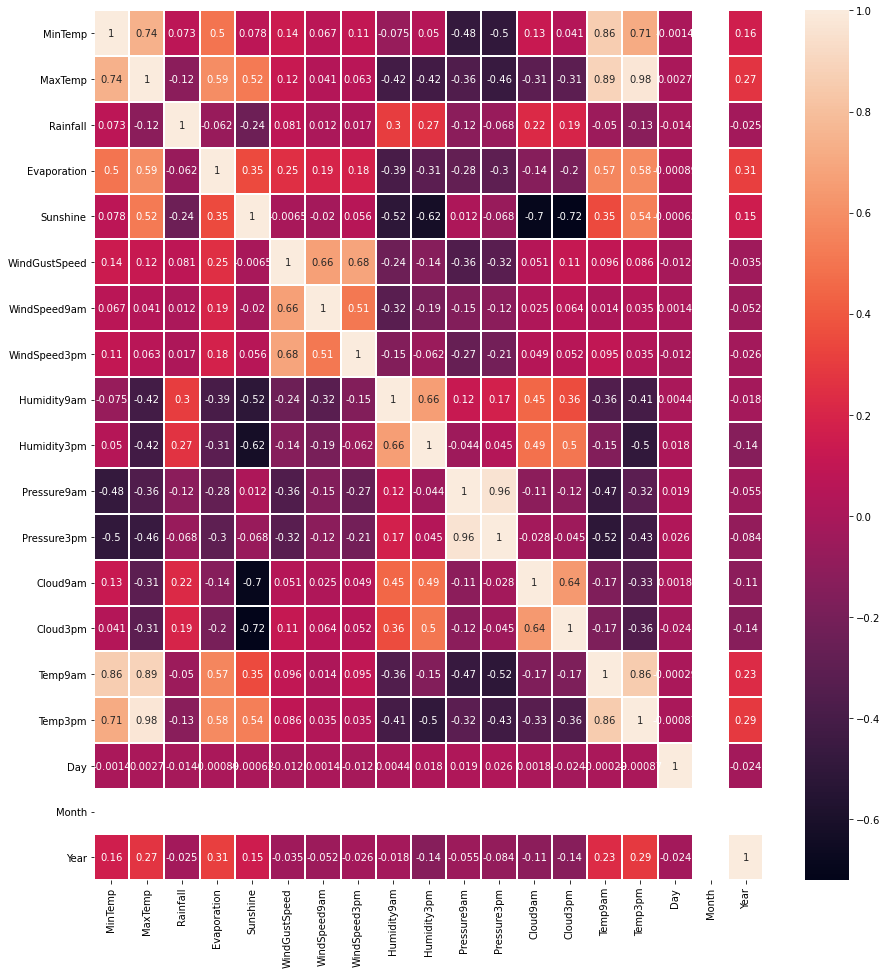

In [68]:
plt.figure(figsize=(15,16))
sns.heatmap(t_corr,annot=True,linewidth=1)
plt.show()

# Visualizing correlation of feature columns with label column.

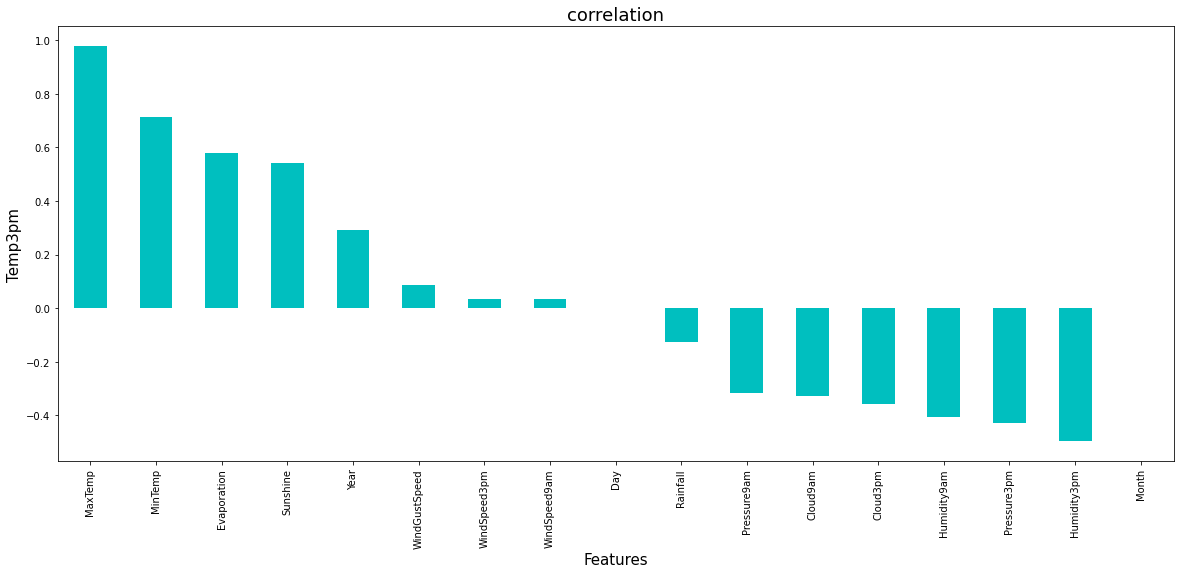

In [69]:
plt.figure(figsize = (20,8))
tDF.corr()['Temp3pm'].sort_values(ascending = False).drop(['Temp3pm','Temp9am']).plot(kind='bar',color = 'c')
plt.xlabel('Features',fontsize=15)
plt.ylabel('Temp3pm',fontsize=15)
plt.title('correlation',fontsize = 18)
plt.show()

MaxTemp,MinTemp,Evaporation,Sunshine have the highest positive correlation with Pressure9am,Cloud9am,Cloud3am,Humidity9am,Pressurepm,Humidity3pm have the highest negative correlation with Temp3pm